#### This script demonstrates the k-means algorithm for MNIST images 
#### Name : Do-Hyun Kim
#### Student ID : 2018120193
#### github : https://github.com/ppooiiuuyh/datamining_assignments/tree/master/assignment04

###### ====================================================================================================================
######  import modules
###### ====================================================================================================================

In [1]:
import matplotlib.pyplot as plt
import numpy as np

###### ====================================================================================================================
###### prepare global variables
###### ====================================================================================================================

In [2]:
# ----------------------------------------------------------
# prepare global variables : global parameters
# ----------------------------------------------------------
file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image
num_clusters = 10

num_image   = len(data)
count       = 0     # count for the number of images


# ----------------------------------------------------------
# prepare global variables : make a matrix each column of which represents an images in a vector form
# ----------------------------------------------------------
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_true_label  = np.empty(num_image, dtype=int)
list_label  = np.empty(num_image, dtype=int)

# ----------------------------------------------------------
# evaluation histories
# ----------------------------------------------------------
acc_hist = []
eng_hist = []

###### ====================================================================================================================
###### functions
###### ====================================================================================================================


In [3]:
# ----------------------------------------------------------
# normalize the values of the input data to be [0, 1]
# ----------------------------------------------------------
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)


In [4]:
# ----------------------------------------------------------
# example of distance function between two vectors x and y
# ----------------------------------------------------------
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    r = np.sqrt(s)

    return(r)

In [5]:
# ----------------------------------------------------------
# init label for k-means clusturing
# ----------------------------------------------------------
def initialiseLabel(num_clusters):
    list_label_ = np.random.choice(num_clusters,num_image,replace=True)
    return list_label_

In [6]:
# ----------------------------------------------------------
# computeCentroid
# ----------------------------------------------------------
def computeCentroid():
    list_centroid = np.empty((size_row * size_col, num_clusters), dtype=float)
    list_clusters = [[] for i in range(num_clusters)]
    for i in range(num_image):
        list_clusters[int(list_label[i])].append(list_image[:,i])

    for i in range(num_clusters):
        list_centroid[:,i] = np.mean(list_clusters[i],axis=0)
    return list_centroid


In [7]:
# ----------------------------------------------------------
# plot average images
# ----------------------------------------------------------
def plot_avg_images():
    f2 = plt.figure(2)

    im_average = np.zeros((size_row * size_col, num_clusters), dtype=float)
    im_count = np.zeros(num_clusters, dtype=int)

    for i in range(num_image):
        im_average[:, list_label[i]] += list_image[:, i]
        im_count[list_label[i]] += 1

    for i in range(num_clusters):
        im_average[:, i] /= im_count[i]

        plt.subplot(2, 5, i + 1)
        plt.title(i)
        plt.imshow(im_average[:, i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

        frame = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
    plt.show()

In [8]:
# ----------------------------------------------------------
# plot centroid images
# ----------------------------------------------------------
def plot_centroid_images(images):
    f3 = plt.figure(3)

    for i in range(num_clusters):
        plt.subplot(2, num_clusters/2, i + 1)
        plt.title(i)
        plt.imshow(images[:, i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

        frame = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
    plt.show()

In [9]:
# -------------------------------------------------------------------------
# assign label
# -------------------------------------------------------------------------
def assignLabel():
    list_label_temp = np.empty(num_image,dtype= float)
    for i in range(num_image):
        list_dist = np.empty(num_clusters, dtype = float)
        for ii in range(num_clusters):
            list_dist[ii] = distance(centroids[:,ii],list_image[:,i])
        list_label_temp[i] = np.argmin(list_dist)
    return list_label_temp

In [10]:
# --------------------------------------------------------------------------
# comput accuracy
# --------------------------------------------------------------------------
def computeAccuracy():
    cluster_temps = np.zeros((num_clusters,num_clusters))
    for i in range(num_image):
        cluster_temps[int(list_label[i]),int(list_true_label[i])] += 1
    acc_temps = np.max(cluster_temps,axis=-1) / np.sum(cluster_temps,axis=-1)
    return np.mean(acc_temps)

In [11]:
# --------------------------------------------------------
# comput energy
# --------------------------------------------------------
def computEnergy():
    cluster_temps = np.zeros(num_clusters)
    for i in range(num_image):
        cluster_temps[int(list_label[i])] += distance(centroids[:,int(list_label[i])],list_image[:,i])
    eng_temps = np.mean(cluster_temps)
    return eng_temps

In [12]:
# --------------------------------------------
# plot history
# --------------------------------------------
def plot_centroid_history(history):
    f4 = plt.figure(4)
    plt.plot(history)
    plt.show()

###### ====================================================================================================================
###### preprocessing
###### ====================================================================================================================

In [13]:
# ----------------------------------------------------------
# preprocessing : parse dataset
# ----------------------------------------------------------
for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_true_label[count]       = label
    list_image[:, count]    = im_vector
    count += 1


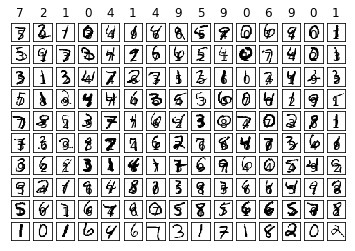

In [14]:
# ----------------------------------------------------------
# preprocessing : plot first 150 images out of 10,000 with their labels
# ----------------------------------------------------------
f1 = plt.figure(1)

for i in range(150):

    label       = list_true_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
#plt.show()

###### ====================================================================================================================
###### main algorithm
###### ====================================================================================================================

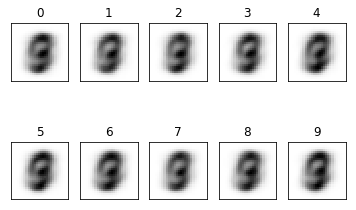

In [15]:
# init label
list_label = initialiseLabel(num_clusters)
# plot the average image of all the images for each digit
#plot_avg_images()
# computeCentroid
centroids = computeCentroid()
#plot initial centroid images(centroids)
plot_centroid_images(centroids)

In [16]:
#clustering loop
while(not(len(acc_hist) > 2 and acc_hist[-1] == acc_hist[-2] and eng_hist[-1] == eng_hist[-2])):
    # assign
    list_label = assignLabel()
    # assignLabel
    centroids = computeCentroid()
    # plot_centroid_images
    # plot_centroid_images(centroids)
    # compute histories
    acc_hist.append(computeAccuracy())
    eng_hist.append(computEnergy())


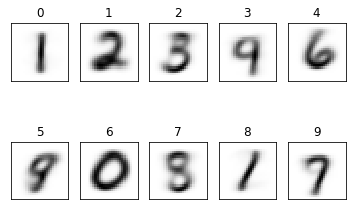

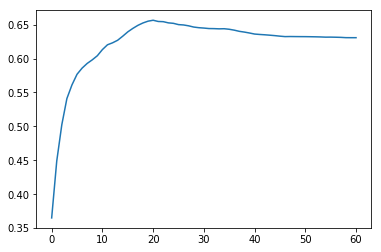

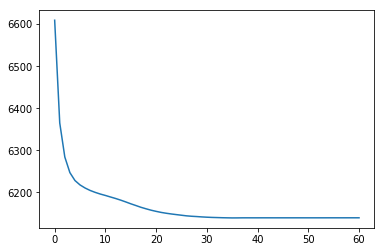

In [17]:
# plot final centroid images
plot_centroid_images(centroids)

# plot histories
plot_centroid_history(acc_hist)
plot_centroid_history(eng_hist)